In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load datasets
zoo2 = pd.read_csv('/content/drive/MyDrive/zumit/unsupervised learning/zoo2.csv')
zoo3 = pd.read_csv('/content/drive/MyDrive/zumit/unsupervised learning/zoo3.csv')

In [3]:
# Display the first 5 datapoints of the datasets
print(zoo2.head(), zoo3.head(), sep='\n')

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      turtle     0         0     1     0         0        1         0   
1   chameleon     0         0     1     0         0        0         0   
2      iguana     0         0     1     0         0        0         1   
3      lizard     0         0     1     0         0        0         1   
4       gecko     0         0     1     0         0        0         0   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        0         1         1         0     0     4     1         1        1   
1        1         1         1         0     0     4     1         1        0   
2        1         1         1         0     0     4     1         1        1   
3        1         1         1         0     0     4     1         0        0   
4        1         1         1         0     0     4     1         1        0   

   class_type  
0           3  
1           3  
2           3  
3   

In [4]:
# Concatenate the dataframes
df = pd.concat([zoo2, zoo3], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 69
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  113 non-null    object
 1   hair         113 non-null    int64 
 2   feathers     113 non-null    int64 
 3   eggs         113 non-null    int64 
 4   milk         113 non-null    int64 
 5   airborne     113 non-null    int64 
 6   aquatic      113 non-null    int64 
 7   predator     113 non-null    int64 
 8   toothed      113 non-null    int64 
 9   backbone     113 non-null    int64 
 10  breathes     113 non-null    int64 
 11  venomous     113 non-null    int64 
 12  fins         113 non-null    int64 
 13  legs         113 non-null    int64 
 14  tail         113 non-null    int64 
 15  domestic     113 non-null    int64 
 16  catsize      113 non-null    int64 
 17  class_type   113 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 16.8+ KB


In [5]:
# Reset index to avoid repetition
df.set_index('animal_name', inplace=True)
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  113 non-null    object
 1   hair         113 non-null    int64 
 2   feathers     113 non-null    int64 
 3   eggs         113 non-null    int64 
 4   milk         113 non-null    int64 
 5   airborne     113 non-null    int64 
 6   aquatic      113 non-null    int64 
 7   predator     113 non-null    int64 
 8   toothed      113 non-null    int64 
 9   backbone     113 non-null    int64 
 10  breathes     113 non-null    int64 
 11  venomous     113 non-null    int64 
 12  fins         113 non-null    int64 
 13  legs         113 non-null    int64 
 14  tail         113 non-null    int64 
 15  domestic     113 non-null    int64 
 16  catsize      113 non-null    int64 
 17  class_type   113 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 16.0+ KB


In [6]:
# Drop irrelevant columns and separate class labels
df_class = df['class_type']
df.drop(['animal_name', 'class_type'], axis=1, inplace=True)

In [7]:
# Normalize the dataset
df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,0.0


In [8]:
# K-Means Clustering
from sklearn.cluster import KMeans

In [9]:
# Initialize SSE list
sse = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

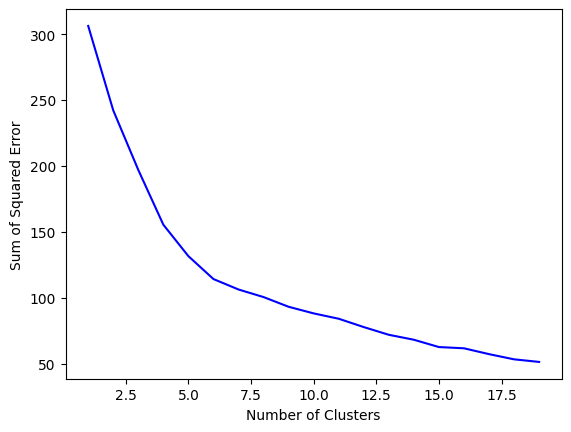

In [10]:
# Plot the SSE for different numbers of clusters
plt.plot(range(1, 20), sse, color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

In [13]:
# installing kneed
!pip install kneed


In [14]:
# Determine the optimal number of clusters using KneeLocator
from kneed import KneeLocator

In [15]:
kneedle = KneeLocator(range(1, 20), sse, S=1.0, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow
print(f'Optimal number of clusters for K-Means: {optimal_clusters}')

Optimal number of clusters for K-Means: 6


In [16]:
# Train KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans_labels = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Calculate MSE and silhouette score for KMeans
from sklearn import metrics

In [18]:
kmeans_silhouette_avg = metrics.silhouette_score(df, kmeans_labels)
MSE_kmeans = np.mean((kmeans_labels - df_class.values)**2)
print(f'KMeans Silhouette score: {kmeans_silhouette_avg}')
print(f'KMeans Mean Squared Error: {MSE_kmeans}')

KMeans Silhouette score: 0.34842089374110796
KMeans Mean Squared Error: 11.70796460176991


In [19]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [20]:
# Find the optimal epsilon for DBSCAN
neighbors = NearestNeighbors(n_neighbors=16)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

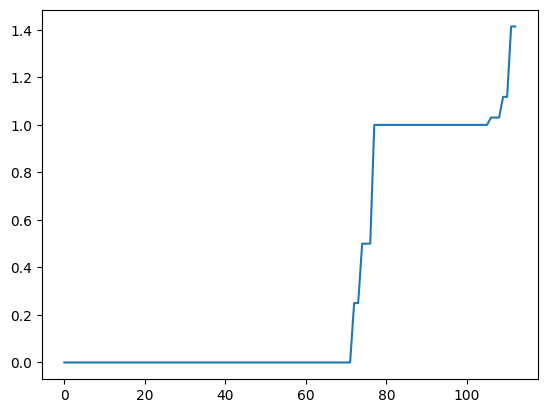

In [21]:
plt.plot(distances)
plt.show()

In [22]:
kneedle = KneeLocator(range(1, len(distances) + 1), distances, S=1.0, curve="concave", direction="increasing")
optimal_eps = kneedle.knee
print(f'Optimal epsilon for DBSCAN: {optimal_eps}')

Optimal epsilon for DBSCAN: 1


In [23]:
# Train DBSCAN with the optimal epsilon
dbscan = DBSCAN(eps=optimal_eps, min_samples=16)
dbscan_labels = dbscan.fit_predict(df)

In [29]:
import numpy as np

unique_labels = np.unique(dbscan_labels)
print(f'Unique labels in DBSCAN: {unique_labels}')

Unique labels in DBSCAN: [-1  0  1  2  3]


In [31]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjusted the parameters
dbscan_labels = dbscan.fit_predict(df)

In [32]:
# Check unique labels
unique_labels = np.unique(dbscan_labels)
print(f'Unique labels in DBSCAN: {unique_labels}')

Unique labels in DBSCAN: [-1  0  1  2  3]


In [33]:
# Calculate silhouette score if there are more than one cluster
if len(unique_labels) > 1:
    dbscan_silhouette = metrics.silhouette_score(df, dbscan_labels)
    print(f'DBSCAN Silhouette score: {dbscan_silhouette}')
else:
    print('Silhouette score cannot be calculated for a single cluster.')


DBSCAN Silhouette score: 0.024520305318938652


In [34]:
# Calculate MSE
MSE_dbscan = np.mean((dbscan_labels - df_class.values)**2)
print(f'DBSCAN Mean Squared Error: {MSE_dbscan}')

DBSCAN Mean Squared Error: 21.734513274336283


In [35]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

In [36]:
# Determine the optimal number of clusters using silhouette scores
silhouette_scores = []
for n_clusters in range(2, 11):
    hcluster = AgglomerativeClustering(n_clusters=n_clusters)
    hcluster_labels = hcluster.fit_predict(df)
    silhouette_avg = metrics.silhouette_score(df, hcluster_labels)
    silhouette_scores.append(silhouette_avg)

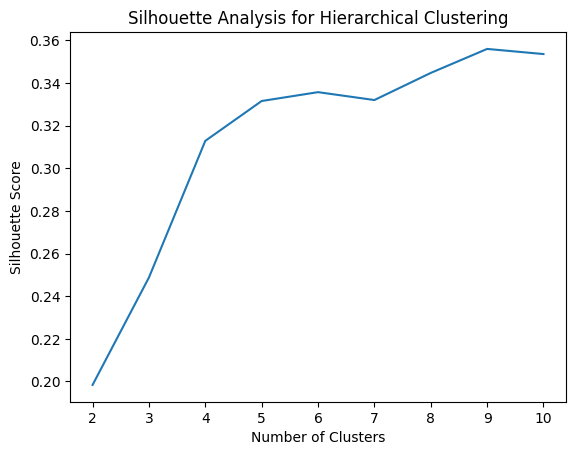

In [37]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [38]:
optimal_clusters_hierarchical = np.argmax(silhouette_scores) + 2
print(f'Optimal number of clusters for Hierarchical Clustering: {optimal_clusters_hierarchical}')


Optimal number of clusters for Hierarchical Clustering: 9


In [39]:
# Train Hierarchical Clustering with the optimal number of clusters
hcluster = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical, affinity='euclidean', linkage='ward')
hcluster_labels = hcluster.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [40]:
# Calculate MSE and silhouette score for Hierarchical Clustering
hcluster_silhouette_avg = metrics.silhouette_score(df, hcluster_labels)
MSE_HCluster = np.mean((hcluster_labels - df_class.values)**2)
print(f'Hierarchical Clustering Silhouette score: {hcluster_silhouette_avg}')
print(f'Hierarchical Clustering Mean Squared Error: {MSE_HCluster}')


Hierarchical Clustering Silhouette score: 0.35597514562521826
Hierarchical Clustering Mean Squared Error: 3.7876106194690267


In [41]:
# Visualize the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

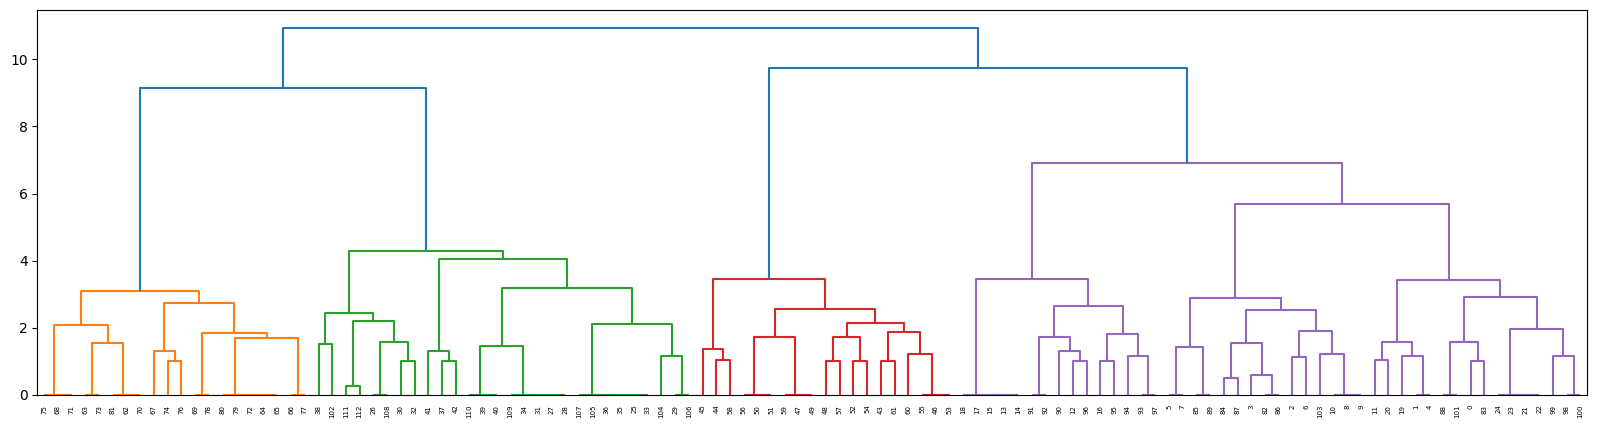

In [42]:
plt.figure(figsize=(20, 5))
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [43]:
# Visualize clusters for each algorithm using PCA
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df)

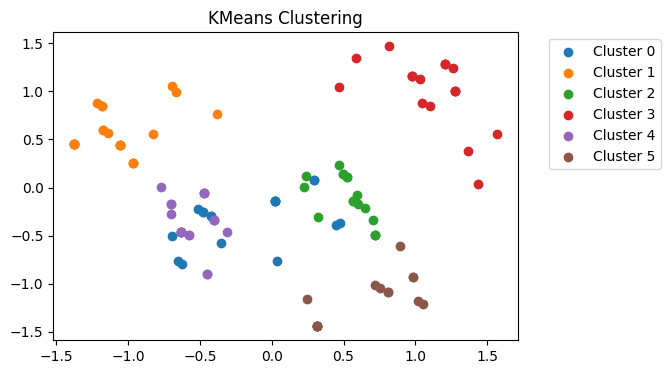

In [45]:
# KMeans clustering visualization
plt.figure(figsize=(6, 4))
for i in range(optimal_clusters):
    plt.scatter(x_pca[kmeans_labels == i][:, 0], x_pca[kmeans_labels == i][:, 1], label=f'Cluster {i}')
plt.title('KMeans Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

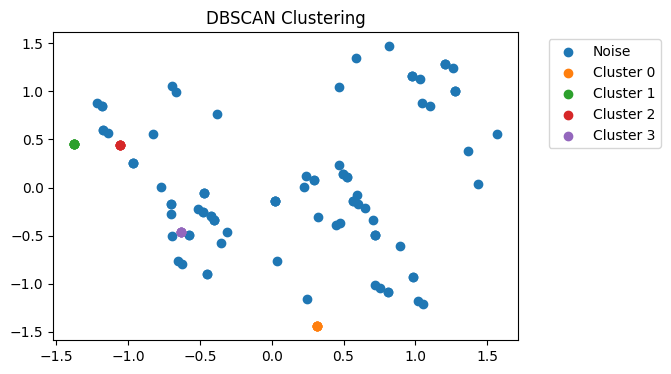

In [46]:
# DBSCAN clustering visualization
plt.figure(figsize=(6, 4))
for i in np.unique(dbscan_labels):
    if i == -1:
        label = 'Noise'
    else:
        label = f'Cluster {i}'
    plt.scatter(x_pca[dbscan_labels == i][:, 0], x_pca[dbscan_labels == i][:, 1], label=label)
plt.title('DBSCAN Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

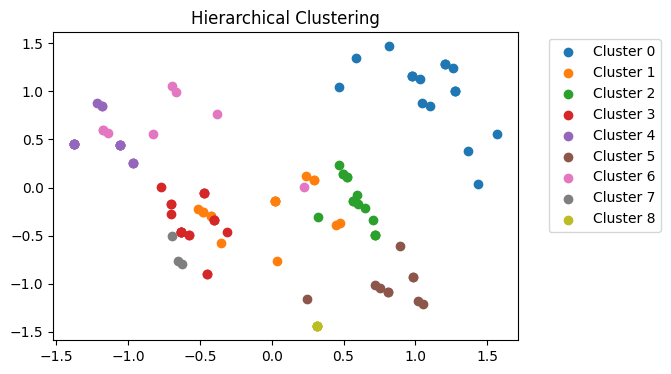

In [47]:
# Hierarchical clustering visualization
plt.figure(figsize=(6, 4))
for i in range(optimal_clusters_hierarchical):
    plt.scatter(x_pca[hcluster_labels == i][:, 0], x_pca[hcluster_labels == i][:, 1], label=f'Cluster {i}')
plt.title('Hierarchical Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-48-1578d21f7628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Mean Squared Error', data=mse_df, palette='viridis')


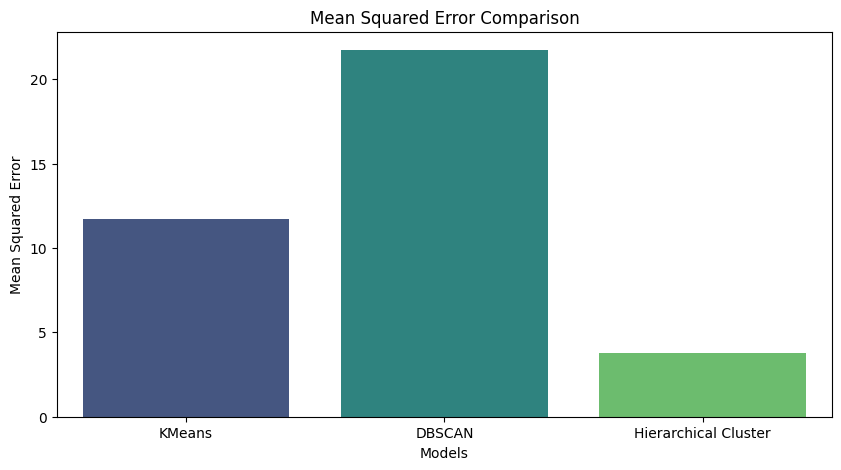

In [48]:
# Compare MSEs of the models
MSEs = {'KMeans': MSE_kmeans, 'DBSCAN': MSE_dbscan, 'Hierarchical Cluster': MSE_HCluster}
mse_df = pd.DataFrame({'Models': list(MSEs.keys()), 'Mean Squared Error': list(MSEs.values())})

fig = plt.figure(figsize=(10, 5))
sns.barplot(x='Models', y='Mean Squared Error', data=mse_df, palette='viridis')
plt.title('Mean Squared Error Comparison')
plt.show()

In [49]:
# Compare Silhouette scores of the models
silhouette = {'KMeans': kmeans_silhouette_avg, 'DBSCAN': dbscan_silhouette, 'Hierarchical Cluster': hcluster_silhouette_avg}
silhouette_df = pd.DataFrame({'Models': list(silhouette.keys()), 'Silhouette Score': list(silhouette.values())})


<ipython-input-50-1272b992126d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Silhouette Score', data=silhouette_df, palette='viridis')


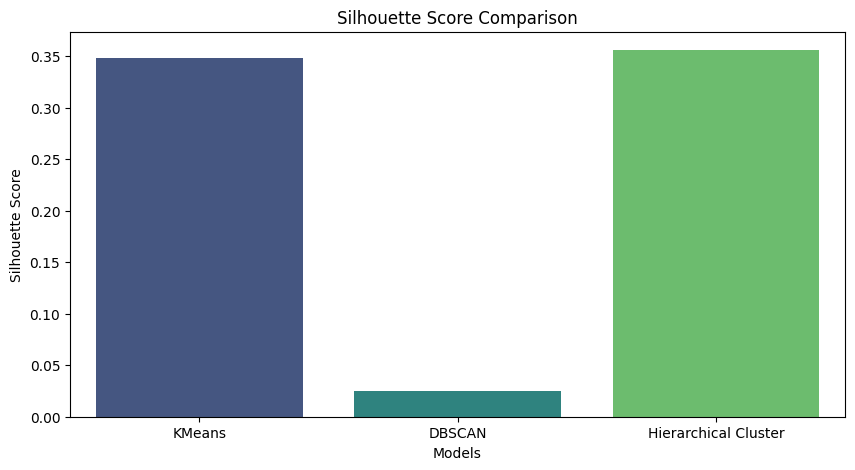

In [50]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x='Models', y='Silhouette Score', data=silhouette_df, palette='viridis')
plt.title('Silhouette Score Comparison')
plt.show()

In [51]:
# Conclusion: The Hierarchical Clustering model has the highest silhouette score, indicating better-defined clusters.
# However, KMeans has the lowest MSE, indicating better numerical accuracy.